<a href="https://colab.research.google.com/github/Raziel-JKM/Practice/blob/main/ai/EX-1/rock_scissor_paper_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#가위바위보 분류기

In [ ]:
from PIL import Image
import os, glob

In [ ]:
import os
SEED = 42 
os.environ['PYTHONHASHSEED'] = str(SEED) 
os.environ['TF_DETERMINISTIC_OPS'] = '1' 
import random 
random.seed(SEED) 
import tensorflow as tf 
import numpy as np 
tf.random.set_seed(SEED) 
np.random.seed(SEED)

#1. 이미지 사이즈 변경

In [ ]:
#이미지의 크기가 28x28  변경
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

- 트레인 이미지 사이즈 변경

In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/Data/train/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/Data/train/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/Data/train/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


- 데이터 셋  이미지 사이즈 변경

In [ ]:
test_scissor_image_dir_path = "/content/drive/MyDrive/Data/test/scissor"
resize_images(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize

test_rock_image_dir_path = "/content/drive/MyDrive/Data/test/rock"
resize_images(test_rock_image_dir_path)   # 테스트 바위 이미지 resize

test_paper_image_dir_path = "/content/drive/MyDrive/Data/test/paper"
resize_images(test_paper_image_dir_path)   # 테스트 보 이미지 resize

108  images to be resized.
108  images resized.
103  images to be resized.
103  images resized.
101  images to be resized.
101  images resized.


- Train set 가위 바위 보 라벨링

In [ ]:
#가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
import numpy as np

def load_data_train(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


- Test set 가위 바위 보 라벨링

In [ ]:
#가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
import numpy as np

def load_data_test(img_path, number_of_data=312):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


- 

In [ ]:
image_dir_path = "/content/drive/MyDrive/Data/train/"
(x_train, y_train)=load_data_train(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


In [ ]:
image_dir_path4 ="/content/drive/MyDrive/Data/test"
(x_test, y_test)=load_data_test(image_dir_path4)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

학습데이터(x_train)의 이미지 개수는 312 입니다.
x_test shape: (312, 28, 28, 3)
y_test shape: (312,)


라벨:  0


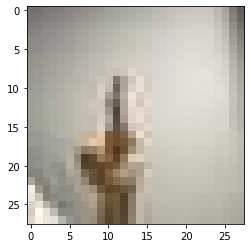

In [ ]:
#잘 적용 되었는지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  2


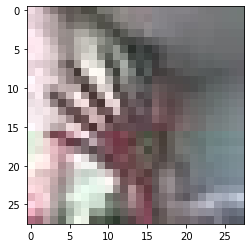

In [ ]:
#잘 적용 되었는지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[900])
print('라벨: ', y_train[900])


라벨:  1


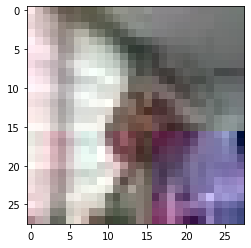

In [ ]:
#잘 적용 되었는지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[400])
print('라벨: ', y_train[400])

In [ ]:
print(x_train.shape)

(1200, 28, 28, 3)


In [ ]:
#이미지 제너레이터
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        validation_split=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28 , 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


#네트워크 설계

In [ ]:
import tensorflow as tf
# Initialising the CNN
model = tf.keras.models.Sequential()

# Step 1 - Convolution
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 3]))
# Step 2 - Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))
# Step 3 - Flattening
model.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
# Compiling the CNN
model.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
result  = model.fit(x = train_gen, validation_data = val_gen, epochs = 30)   

Epoch 1/30
30/30 [==============================] - 4s 115ms/step - loss: 1.1039 - accuracy: 0.3385 - val_loss: 1.0970 - val_accuracy: 0.3500
Epoch 2/30
30/30 [==============================] - 4s 119ms/step - loss: 1.1001 - accuracy: 0.3406 - val_loss: 1.0938 - val_accuracy: 0.4542
Epoch 3/30
30/30 [==============================] - 4s 118ms/step - loss: 1.0962 - accuracy: 0.3740 - val_loss: 1.0867 - val_accuracy: 0.4292
Epoch 4/30
30/30 [==============================] - 3s 110ms/step - loss: 1.0916 - accuracy: 0.3823 - val_loss: 1.0718 - val_accuracy: 0.4625
Epoch 5/30
30/30 [==============================] - 3s 108ms/step - loss: 1.0755 - accuracy: 0.4187 - val_loss: 1.0400 - val_accuracy: 0.4250
Epoch 6/30
30/30 [==============================] - 3s 109ms/step - loss: 1.0733 - accuracy: 0.4198 - val_loss: 1.0440 - val_accuracy: 0.4375
Epoch 7/30
30/30 [==============================] - 3s 114ms/step - loss: 1.0543 - accuracy: 0.4417 - val_loss: 1.0229 - val_accuracy: 0.4875
Epoch 